**Problem Statement**

Diabetes is a chronic health condition that affects how the body converts food into energy. Early detection of diabetes is crucial to prevent severe health complications such as heart disease, kidney failure, and nerve damage. Traditional diagnosis methods require extensive medical tests and time.

The objective of this project is to develop a predictive model using Logistic Regression to determine whether a patient is likely to have diabetes based on specific medical attributes such as glucose level, BMI, insulin, and age.

By analyzing the Pima Indians Diabetes dataset, this project aims to:

Explore and understand the key factors influencing diabetes occurrence.

Build a machine learning model to classify patients as diabetic or non-diabetic.

Evaluate the model’s performance using metrics like accuracy, confusion matrix, ROC curve, and AUC score.


Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


Import Dataset

In [2]:
df = pd.read_csv("/content/diabetes.csv")

Exploratory Data Analysis

In [20]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.677083,72.389323,29.089844,141.753906,32.434635,0.471876,33.240885,0.348958
std,3.369578,30.464161,12.106039,8.890820,89.100847,6.880498,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,102.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,102.500000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,169.500000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Checking For missing Values

In [5]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Checking For Duplicates

In [6]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [7]:
df[dups]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


Correlation HeatMap Plot

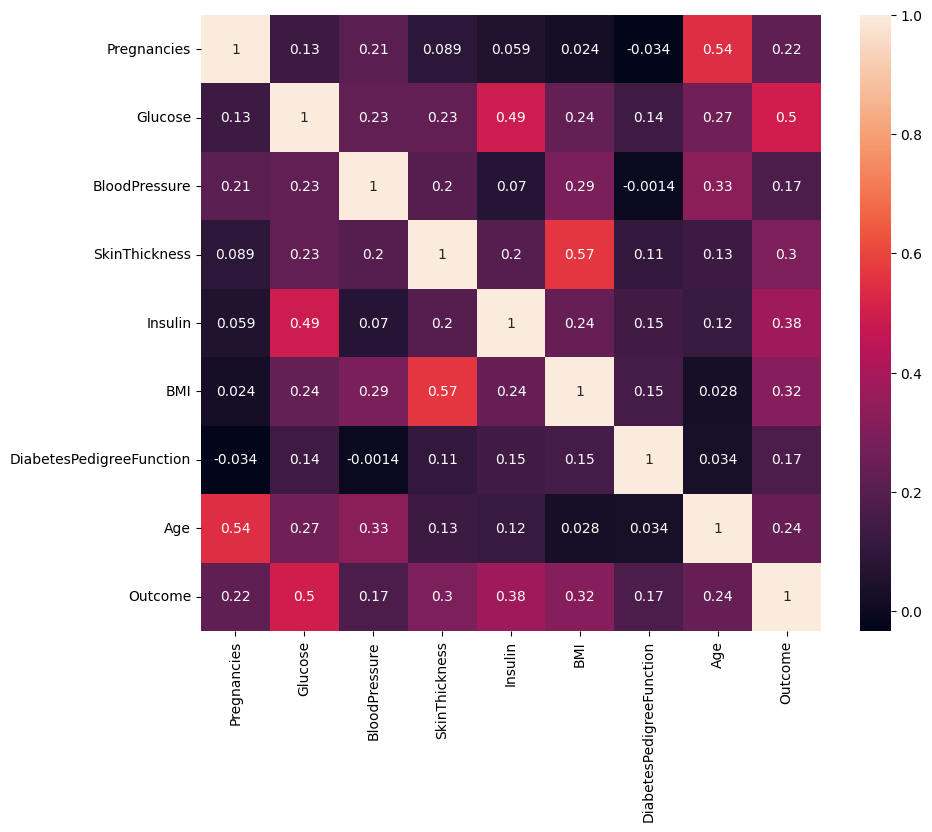

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.iloc[:,0:9].corr(), annot=True)
plt.show()

Checking for Outliers

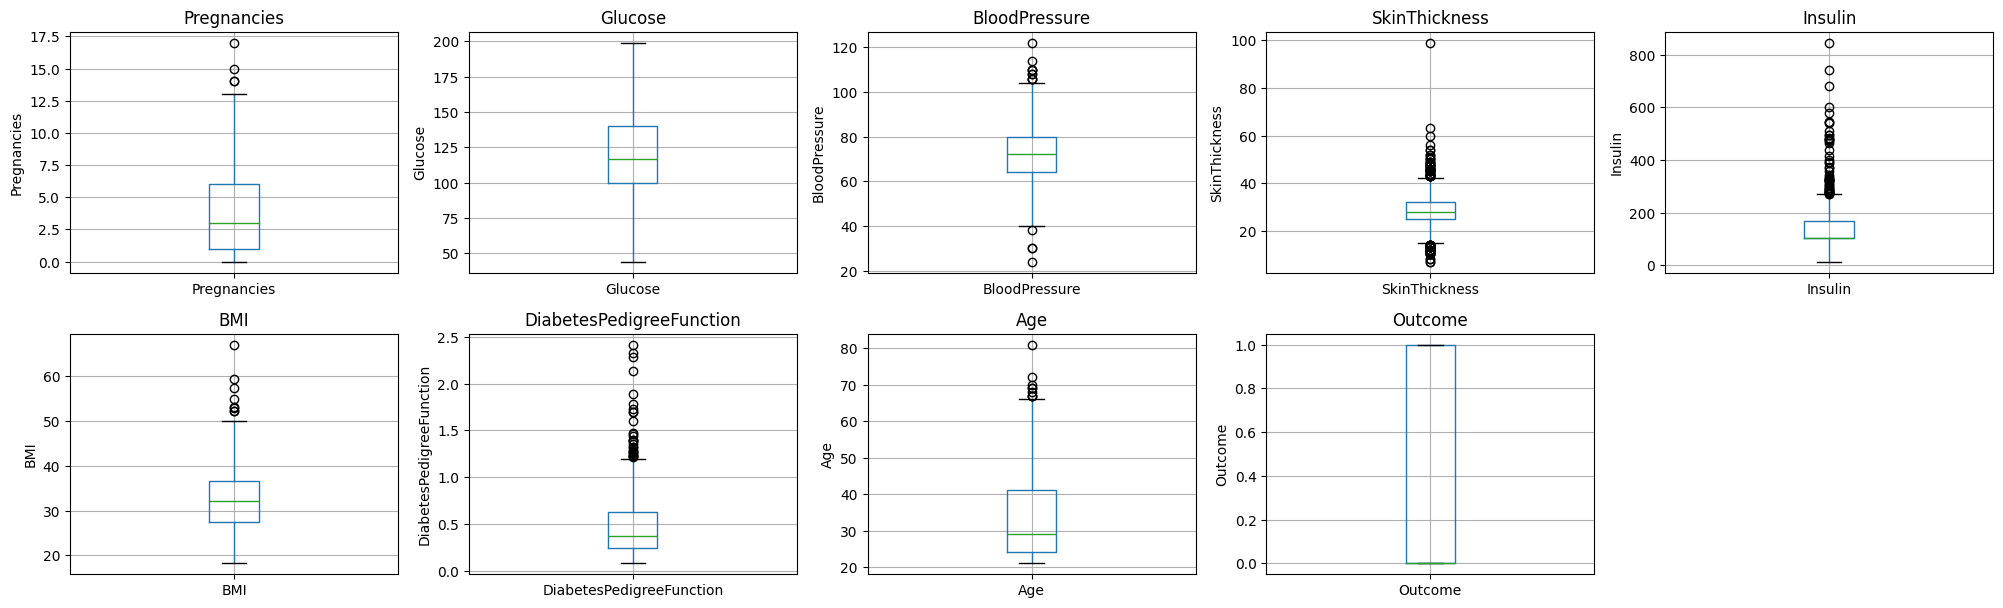

In [9]:
plt.figure(figsize=(20, 15))
numerical_cols = df.select_dtypes(include=np.number).columns
for i, column in enumerate(numerical_cols):
    plt.subplot(5, 5, i + 1)
    df.boxplot(column=column)
    plt.title(column)
    plt.ylabel(column)
plt.tight_layout()
plt.show()

Outlier treatment

In [12]:
def remove_outlier(col) :
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  IQR=Q3-Q1
  lower_range=Q1-(1.5*IQR)
  upper_range=Q3+(1.5*IQR)
  return lower_range,upper_range

In [13]:
for column in df.columns:
    lr,ur = remove_outlier(df[column])
    df[column] = np.where(df[column] < lr, lr, df[column])
    df[column] = np.where(df[column] > ur, ur, df[column])

Rechecking after outlier treatment

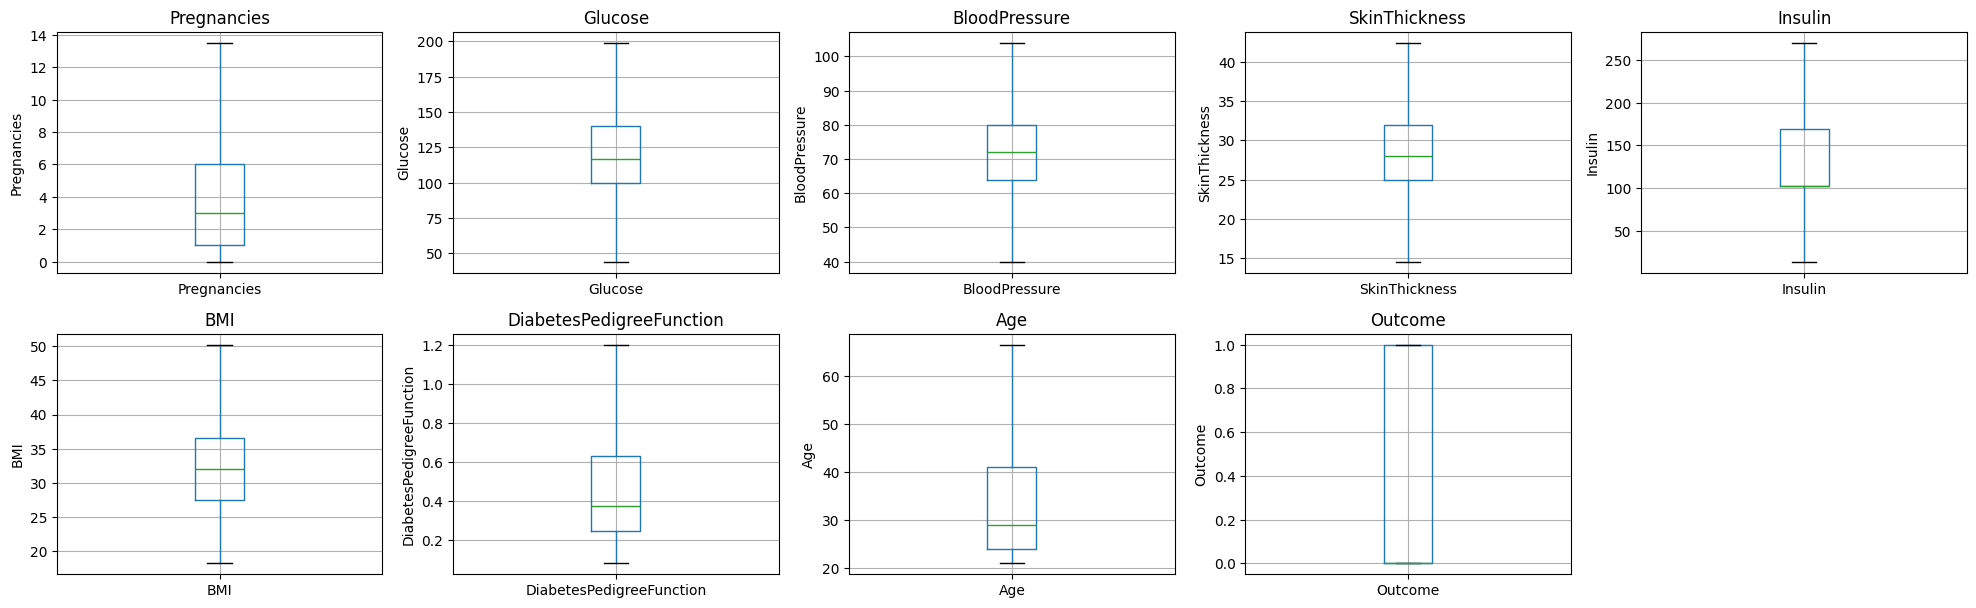

In [14]:
plt.figure(figsize=(20, 15))
numerical_cols = df.select_dtypes(include=np.number).columns

for i, column in enumerate(numerical_cols):
    plt.subplot(5, 5, i + 1)
    df.boxplot(column=column)
    plt.title(column)
    plt.ylabel(column)

plt.tight_layout()
plt.show()

Data Distribution

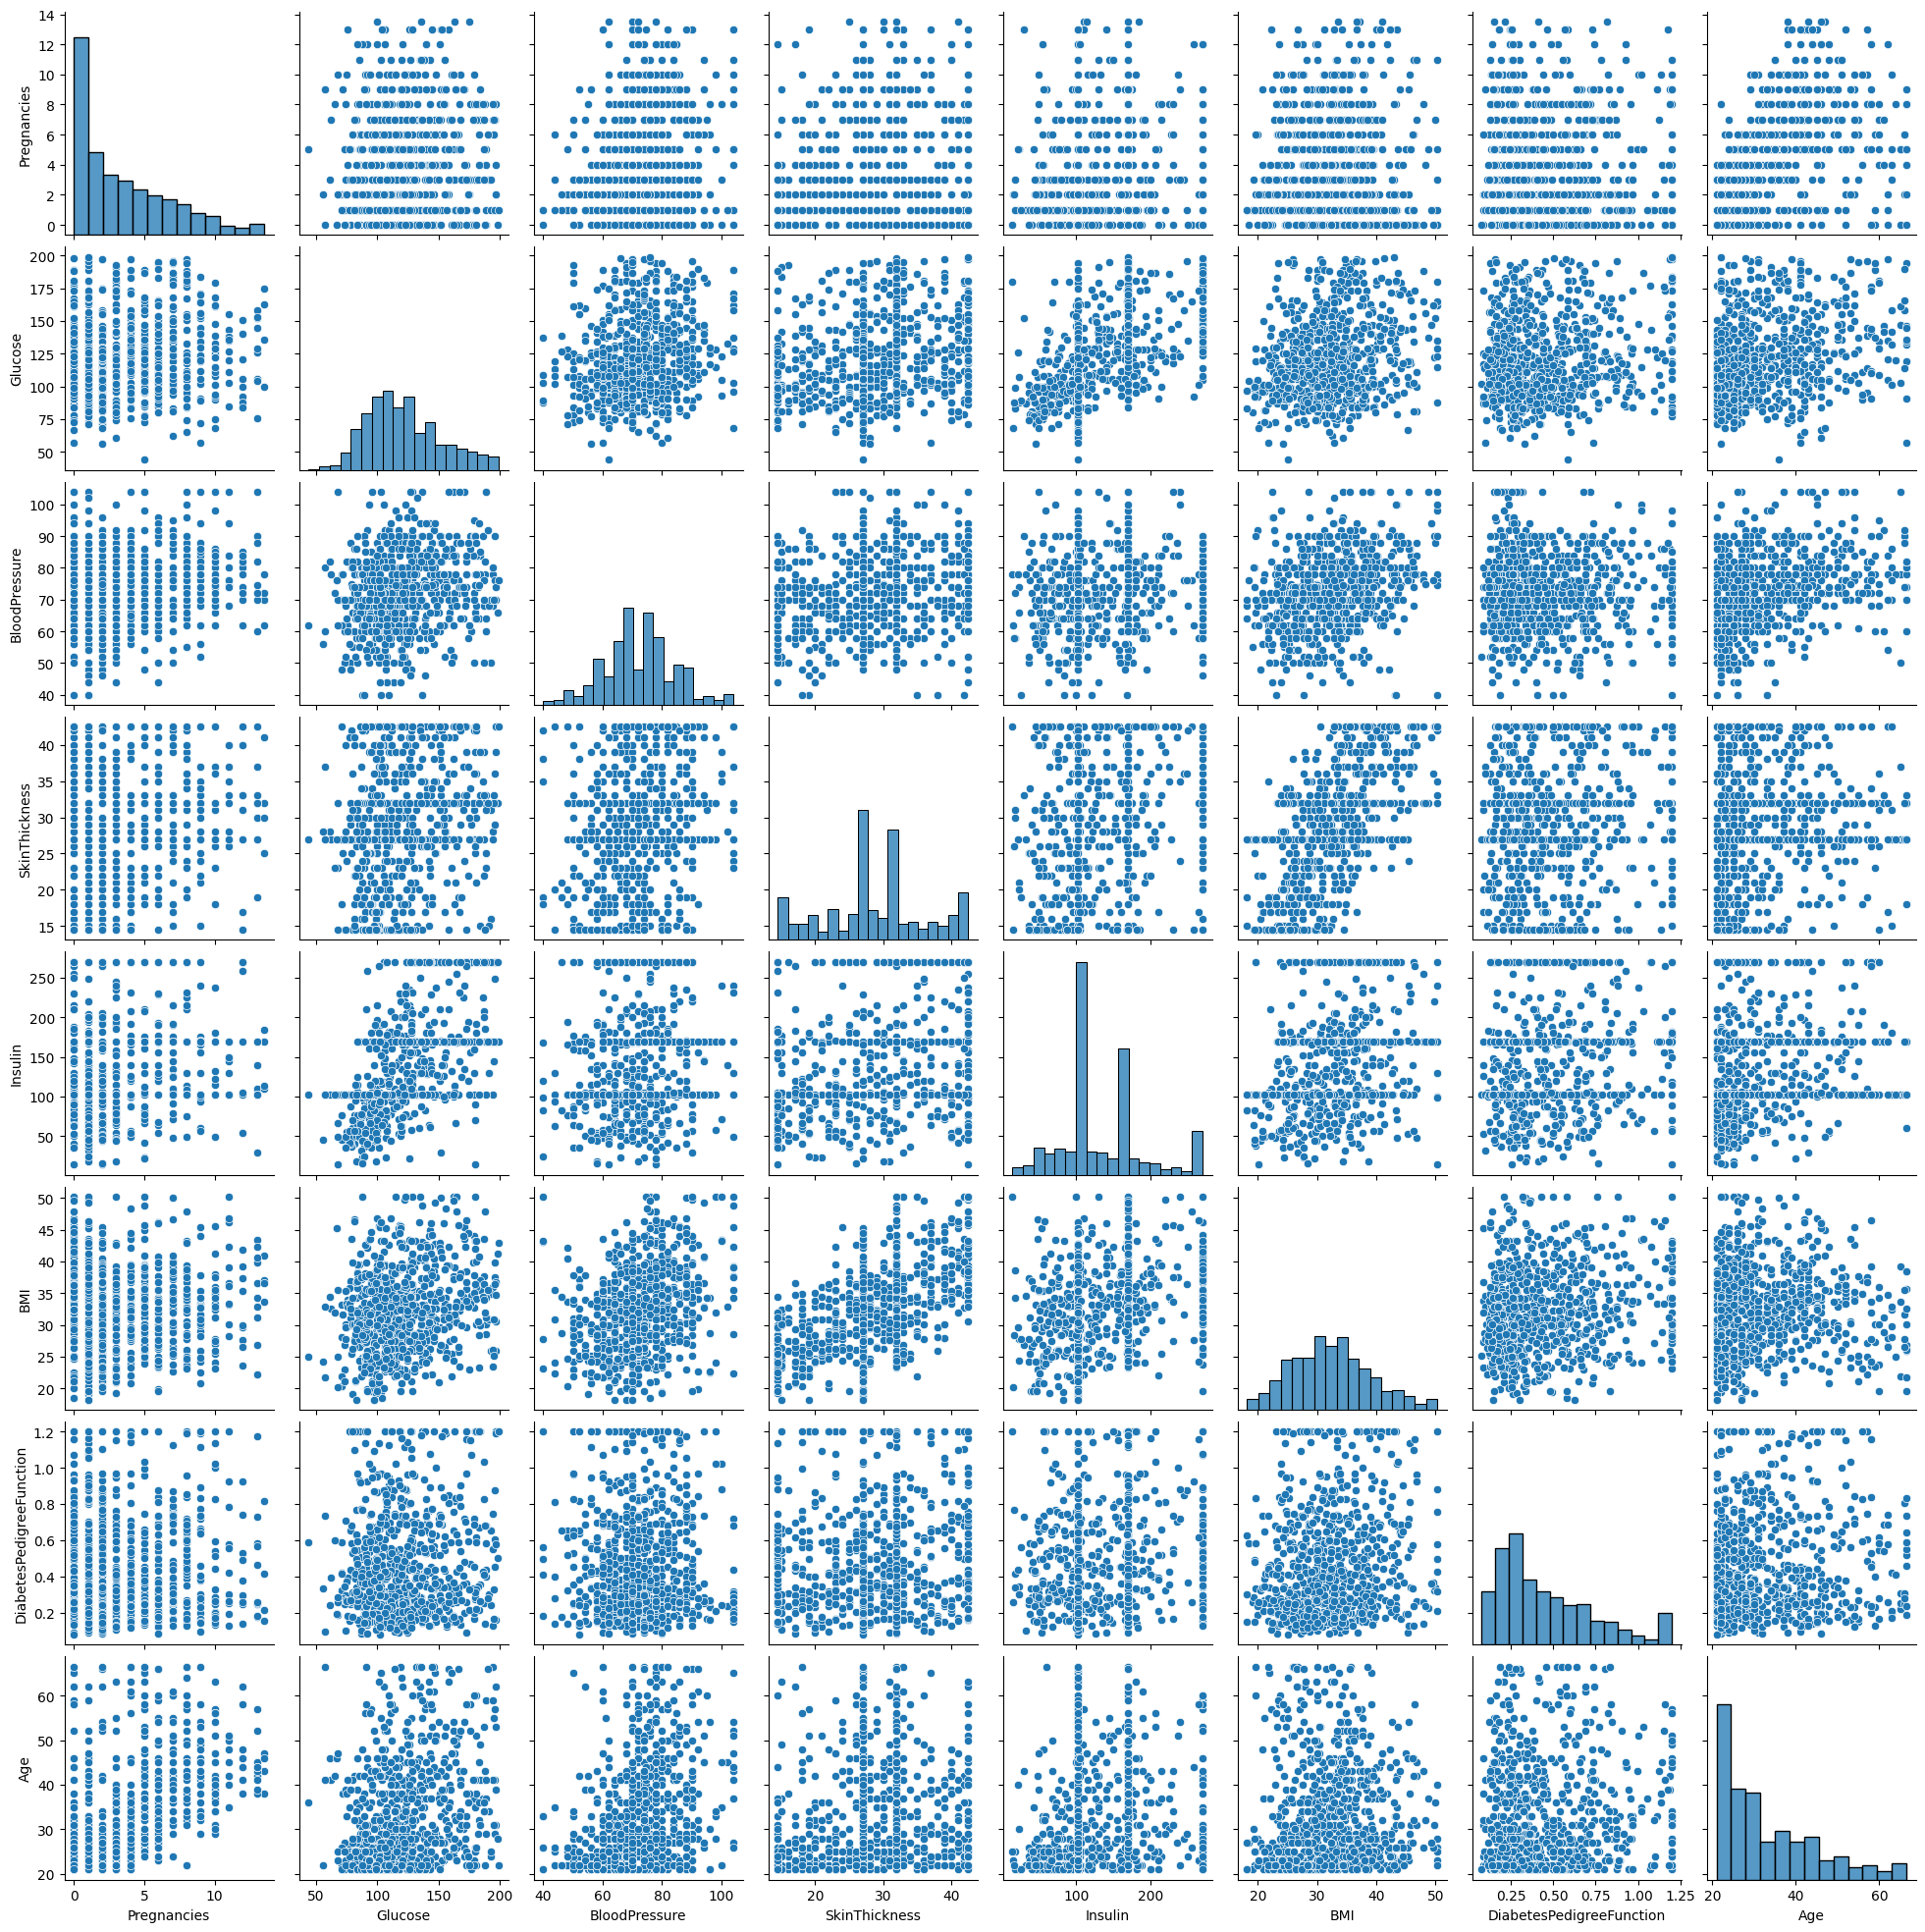

In [15]:
df_attr=(df.drop(['Outcome'],axis=1))
sns.pairplot(df_attr)
plt.show()

Train-Test Split

In [17]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']

In [18]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31.0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0


In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Random Forest Model

In [21]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [22]:
rfcl = RandomForestClassifier(
    n_estimators=500,   # more trees
    max_depth=None,     # allow trees to grow deep
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight="balanced",  # force fairness
    random_state=42
)

In [23]:
rfcl.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=500,
                       random_state=42)

prediction

In [24]:
ytrain_predict= rfcl.predict(x_train)
ytest_predict= rfcl.predict(x_test)

Train Accuracy

In [25]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, ytrain_predict))

1.0


Evaluating Model Performance with Confusion Matrix

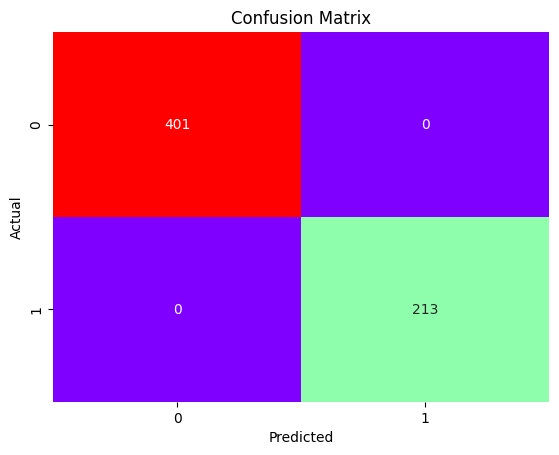

In [26]:
confusion_matrix(y_train, ytrain_predict)
sns.heatmap(confusion_matrix(y_train, ytrain_predict), annot=True, fmt='g',cbar=False,cmap='rainbow')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [27]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       401
         1.0       1.00      1.00      1.00       213

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



Test Accuracy

In [28]:
print(accuracy_score(y_test, ytest_predict))

0.8766233766233766


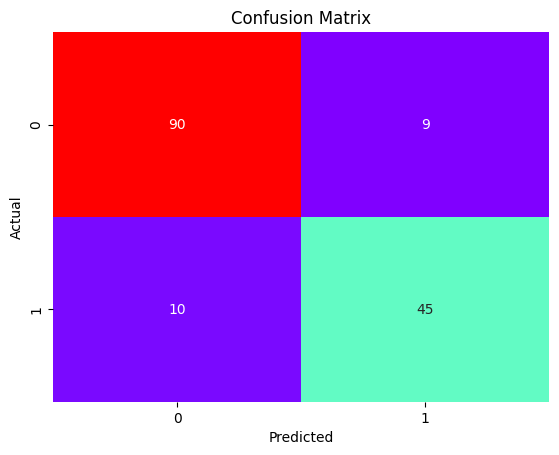

In [29]:
confusion_matrix(y_test, ytest_predict)
sns.heatmap(confusion_matrix(y_test, ytest_predict), annot=True, fmt='g',cbar=False,cmap='rainbow')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [33]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90        99
         1.0       0.83      0.82      0.83        55

    accuracy                           0.88       154
   macro avg       0.87      0.86      0.87       154
weighted avg       0.88      0.88      0.88       154



Hyper Parameter Tuning for Overcoming the Overfitting

In [32]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced']
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=2)
grid_search.fit(x_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters found:  {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation score:  0.887653435357883


Train Accuracy with tuned model:  0.9837133550488599
Test Accuracy with tuned model:  0.8701298701298701

Classification Report with tuned model:
               precision    recall  f1-score   support

         0.0       0.92      0.88      0.90        99
         1.0       0.80      0.85      0.82        55

    accuracy                           0.87       154
   macro avg       0.86      0.87      0.86       154
weighted avg       0.87      0.87      0.87       154



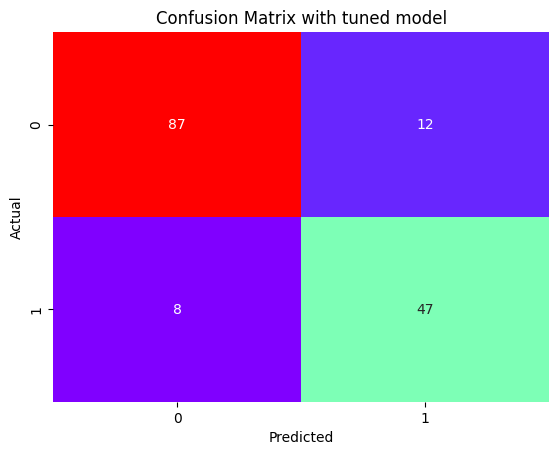

In [34]:
best_rf_model = grid_search.best_estimator_
ytrain_predict_tuned = best_rf_model.predict(x_train)
ytest_predict_tuned = best_rf_model.predict(x_test)
print("Train Accuracy with tuned model: ", accuracy_score(y_train, ytrain_predict_tuned))
print("Test Accuracy with tuned model: ", accuracy_score(y_test, ytest_predict_tuned))
print("\nClassification Report with tuned model:\n", classification_report(y_test, ytest_predict_tuned))
sns.heatmap(confusion_matrix(y_test, ytest_predict_tuned), annot=True, fmt='g',cbar=False,cmap='rainbow')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with tuned model')
plt.show()

**Conclusion**

The Logistic Regression model successfully predicted the likelihood of diabetes based on patient health data. Through data preprocessing, feature analysis, and visualization, the model identified important medical indicators such as Glucose Level, BMI, and Age as key factors influencing diabetes risk.

The model achieved good performance with high accuracy and reliability, as confirmed by metrics such as the confusion matrix, ROC curve, and AUC score. This demonstrates that Logistic Regression is an effective and interpretable approach for binary medical classification problems like diabetes prediction.